# CONTENT


1. [Dataset Descrpition](#1)
2. [Diagnose Data](#2)
3. [Missing Data - Corrupt Data](#3)
4. [Correlation between Values](#4)



<a id ="1"></a> <br>
### Description

Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

#### Content
**price** price in US dollars (\$326--\$18,823)

**carat** weight of the diamond (0.2--5.01)

**cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** diamond colour, from J (worst) to D (best)

**clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x** length in mm (0--10.74)

**y** width in mm (0--58.9)

**z** depth in mm (0--31.8)

**depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table** width of top of diamond relative to widest point (43--95)

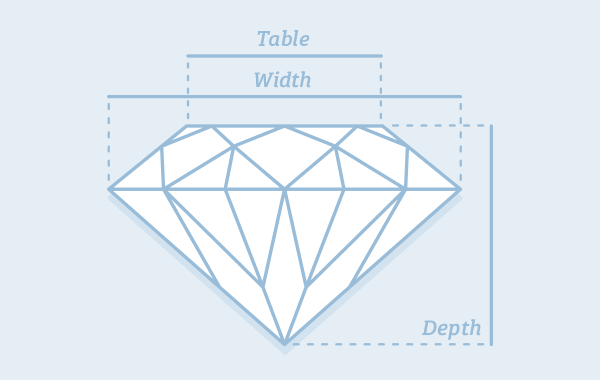

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Görselleştirme
import seaborn as sns #Görselleştirme 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [ ]:
data = pd.read_csv("../input/diamonds.csv") 

<a id="2"></a> <br>
# 2-) Diagnose Data

### We need to diagnose data

In [ ]:
data.info()

**What do we understand from this output**

1. 6 columns of data type 'float'

2. 2 columns of data type 'int'

3. 3 columns of data type 'object'(string)

4. Each column has 10 rows and not have NaN(empty) value

These are the first details. Let's continue


In [ ]:
data.head() #receive first 5 value


**Unnamed: 0** Column is  Unnecessary

In [ ]:
#data.drop(["Sütun Adı"]) , axis = 1 vertical drop , inplace = True update data after drop
data.drop(["Unnamed: 0"] , axis = 1 , inplace = True)

**Unnamed: 0** adlı sütunu yok ettik doğrulamak ve bilgi almak amacıyla tüm sütunların adını alalım


In [ ]:
data.columns #give column name

<a id="3"></a> <br>
# 3-) Missing Data or Corrupt Data

In [ ]:
data.describe() #numerical statistics

**Yeah, something caught my eye.**

      Do you see the Min. Values of X, Y and Z. It can't be possible
      It doesn't make any sense to have either of Length or Width or Height to be zero
       
**Let's have look at them.**


In [ ]:
data.loc[(data["x"] == 0) | (data["y"] == 0) | (data["z"] == 0)]

#Notice that instead of using '&' in the code above, '|' because if we used 'and (&)' it would show data where all are 0

**We don't have empty values, but we have wrong values**

**How do I know how many corrupt values there are**

In [ ]:
#just use len()
len(data[(data["x"] == 0) | (data["y"] == 0) | (data["z"] == 0)])


**20 values are corrupt**

**Keep in mind, dataset  have 53940 lines**

**after drop process dataset must have 53920 lines**

In [ ]:
data = data[np.logical_and(np.logical_and((data["x"] != 0) , (data["y"] != 0))  , (data["z"] != 0))] 
#drop with three condition
#we use NumPy Logical_and method
data.info()

In [ ]:
data.describe()

**there is no more corrupt data**

In [ ]:
data.corr()

<a id="4"></a> <br>
# 4-)Correation Between Values


In [ ]:
f,ax = plt.subplots(figsize = (12,12))
sns.heatmap(data.corr() , annot = True ,linewidths = 2 , fmt = ".2f" , ax = ax)
plt.show()

price,carat,x,y,z directly proportional.

In [ ]:
sns.jointplot(x="carat" , y = "price", data=data , height = 5 , kind = "reg")
plt.show()

Looking at this image, we can see that the columns ** carat ** and ** price ** are directly proportional to each other.


In [ ]:
sns.catplot(x = "cut" ,kind = "count", data = data , aspect = 3)
plt.show()

**Here we look at how many diamonds we have according to their cut quality **
**according to our information**

**1600 diamonds of cut type 'fair'**                                

**4900 diamonds of cut type 'Good'**                                

**12000 diamonds of cut type 'Very Good'**

**13700 diamonds of cut type 'Premium'**

**21600 diamonds of cut type 'Ideal'**

In [ ]:
sns.catplot(x = "cut" , y = "price" , data = data ,aspect = 3)

**we have seen how the quality of the diamond  cuts has an effect on the price.**



**The majority of FAİR Cut diamonds remain below 7,500.**

**The majority of Good Cut diamonds  12.500 - 11.500 remain below 7,500.**

**Ideal and Premium diamonds cuts show the same frequency of intensity at every price scale.**

**Very Good cuttings lose their intensity, albeit slightly above the price of 15,000.**

In [ ]:
sns.catplot(x = "color" , kind = "count" , data = data , aspect = 3)
plt.show()

**J(worst)** to **D(best)**


**Let's see how much color beauty effects on price**

In [ ]:
sns.catplot(x = "color" , y = "price" , data = data , kind = "violin" , aspect = 3)
plt.show()